In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.svm import SVC


In [2]:
# Load MNIST dataset
mnist = datasets.fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# ===== Reduce dataset to 20,000 samples =====
X = X[:20000]
y = y[:20000]

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (16000, 784)
Test data shape: (4000, 784)


In [3]:
# SVM with Linear Kernel
param_grid_linear = {'C': [0.1, 1, 10]}

svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid_linear, cv=3, n_jobs=-1, verbose=2)

start_linear = time.time()
svm_linear.fit(X_train, y_train)
end_linear = time.time()

y_pred_linear = svm_linear.predict(X_test)

print("Best Parameters (Linear):", svm_linear.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear, average='macro'))
print("Recall:", recall_score(y_test, y_pred_linear, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_linear, average='macro'))
print("Training Time: %.2f seconds" % (end_linear - start_linear))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters (Linear): {'C': 0.1}
Accuracy: 0.9155
Precision: 0.9150979222217307
Recall: 0.9143345141695992
F1 Score: 0.9143622853870964
Training Time: 153.82 seconds


In [4]:
# SVM with Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1],
    'degree': [2, 3],
    'coef0': [0.0, 1.0]
}

svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid_poly, cv=3, n_jobs=-1, verbose=2)

start_poly = time.time()
svm_poly.fit(X_train, y_train)
end_poly = time.time()

y_pred_poly = svm_poly.predict(X_test)

print("Best Parameters (Polynomial):", svm_poly.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Precision:", precision_score(y_test, y_pred_poly, average='macro'))
print("Recall:", recall_score(y_test, y_pred_poly, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_poly, average='macro'))
print("Training Time: %.2f seconds" % (end_poly - start_poly))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters (Polynomial): {'C': 1, 'coef0': 1.0, 'degree': 3}
Accuracy: 0.96075
Precision: 0.9607384122062769
Recall: 0.960455845046768
F1 Score: 0.9604925682982547
Training Time: 1145.99 seconds


In [5]:
# SVM with RBF Kernel
param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001]
}

svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=3, n_jobs=-1, verbose=2)

start_rbf = time.time()
svm_rbf.fit(X_train, y_train)
end_rbf = time.time()

y_pred_rbf = svm_rbf.predict(X_test)

print("Best Parameters (RBF):", svm_rbf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf, average='macro'))
print("Recall:", recall_score(y_test, y_pred_rbf, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_rbf, average='macro'))
print("Training Time: %.2f seconds" % (end_rbf - start_rbf))


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters (RBF): {'C': 10, 'gamma': 0.001}
Accuracy: 0.952
Precision: 0.9522223161739289
Recall: 0.9516203096416568
F1 Score: 0.9518093000993678
Training Time: 1771.21 seconds


In [6]:
# Manually input previous classifier results for comparison
previous_results = pd.DataFrame([
    ['KNN (distance, manhattan, k=3)', 0.9717, None, None, None, None],
    ['Random Forest', 0.9674, None, None, None, None],
    ['SGD', 0.9139, None, None, None, None]
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)'])

print("Previous Classifier Results:")
previous_results


Previous Classifier Results:


,Model,Accuracy,Precision,Recall,F1 Score,Training Time (s)
0,"KNN (distance, manhattan, k=3)",0.9717,None,None,None,None
1,Random Forest,0.9674,None,None,None,None
2,SGD,0.9139,None,None,None,None


In [7]:
# Combine SVM and previous classifiers

svm_results = pd.DataFrame([
    ['SVM (Linear)', accuracy_score(y_test, y_pred_linear),
     precision_score(y_test, y_pred_linear, average='macro'),
     recall_score(y_test, y_pred_linear, average='macro'),
     f1_score(y_test, y_pred_linear, average='macro'),
     round(end_linear - start_linear, 2)],

    ['SVM (Polynomial)', accuracy_score(y_test, y_pred_poly),
     precision_score(y_test, y_pred_poly, average='macro'),
     recall_score(y_test, y_pred_poly, average='macro'),
     f1_score(y_test, y_pred_poly, average='macro'),
     round(end_poly - start_poly, 2)],

    ['SVM (RBF)', accuracy_score(y_test, y_pred_rbf),
     precision_score(y_test, y_pred_rbf, average='macro'),
     recall_score(y_test, y_pred_rbf, average='macro'),
     f1_score(y_test, y_pred_rbf, average='macro'),
     round(end_rbf - start_rbf, 2)]
], columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time (s)'])

# Merge 
comparison = pd.concat([svm_results, previous_results], ignore_index=True)
comparison_sorted = comparison.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("Final Comparison of Classifiers on MNIST:")
comparison_sorted


Final Comparison of Classifiers on MNIST:


C:\Users\user\AppData\Local\Temp\ipykernel_14232\3380373528.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison = pd.concat([svm_results, previous_results], ignore_index=True)


,Model,Accuracy,Precision,Recall,F1 Score,Training Time (s)
0,"KNN (distance, manhattan, k=3)",0.97170,NaN,NaN,NaN,NaN
1,Random Forest,0.96740,NaN,NaN,NaN,NaN
2,SVM (Polynomial),0.96075,0.960738,0.960456,0.960493,1145.99
3,SVM (RBF),0.95200,0.952222,0.951620,0.951809,1771.21
4,SVM (Linear),0.91550,0.915098,0.914335,0.914362,153.82
5,SGD,0.91390,NaN,NaN,NaN,NaN


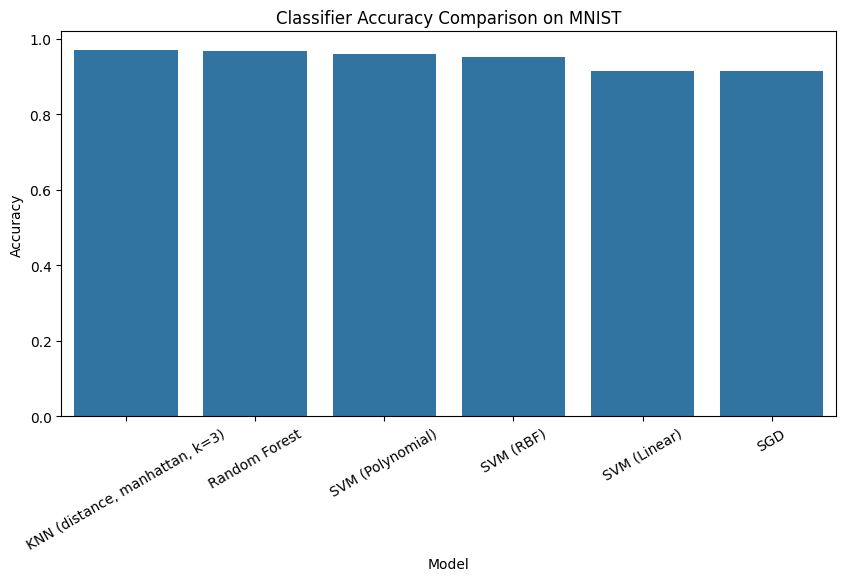

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=comparison_sorted)
plt.title("Classifier Accuracy Comparison on MNIST")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()
